In [1]:
import pandas as pd 

data = pd.read_csv("human-study-results.csv")


new_rows = []
for i, row in data.iterrows():
    row = row.to_dict()
    
    for k in range (1,12):
        new_rows.append({
            "q-id": row["q-id"],
            "situation": row["situation"],
            "model": row[f"model"],
            "ekman": row[f"ekman"],
            "complex": row[f"complex"],
            "pred_score": row[f"eval{k}-pred"],
            "exp_score": row[f"eval{k}-exp"],
            "evaluator": f"evaluator-{k}",
        })
       

df = pd.DataFrame(new_rows)
df.to_csv("human-study-results-long.csv", index=False)

In [ ]:
df.groupby("model").mean()

In [ ]:
df.groupby("ekman").mean()

In [ ]:
df.groupby("ekman").var()

In [ ]:
df.groupby("model").var()

## Inter-annotator agreement

In [33]:
import krippendorff

preds = data[["eval1-pred", "eval2-pred", "eval3-pred", "eval4-pred", "eval5-pred", "eval6-pred", "eval7-pred", "eval8-pred", "eval9-pred", "eval10-pred", "eval11-pred"]].to_numpy()
exps = data[["eval1-exp", "eval2-exp", "eval3-exp", "eval4-exp", "eval5-exp", "eval6-exp", "eval7-exp", "eval8-exp", "eval9-exp", "eval10-exp", "eval11-exp"]].to_numpy()

In [ ]:
krippendorff.alpha(reliability_data=preds, level_of_measurement="ordinal")

In [ ]:
krippendorff.alpha(reliability_data=exps, level_of_measurement="ordinal")

In [ ]:
data

## Likert Visualziation

In [7]:
# Define the Likert scale range
likert_scale = [1, 2, 3, 4, 5]

# Create a pivot table counting occurrences of each pred_score per model
score_counts = pd.crosstab(df['model'], df['pred_score'])

# Ensure all Likert scores are represented, even if count is zero
score_counts = score_counts.reindex(columns=likert_scale, fill_value=0)
score_percentages = score_counts.div(score_counts.sum(axis=1), axis=0) * 100

# Round percentages for readability
score_percentages = score_percentages.round(2)

print(score_percentages)

pred_score      1      2      3     4     5
model                                      
gemma       40.91  36.36  18.18  4.55  0.00
gpt4        63.64  21.21   9.09  3.03  3.03
llama       40.00  34.55  20.00  5.45  0.00
mixtral     52.73  22.73  15.45  8.18  0.91


In [9]:
# Define the Likert scale range
likert_scale = [1, 2, 3, 4, 5]

# Create a pivot table counting occurrences of each pred_score per model
exp_counts = pd.crosstab(df['model'], df['exp_score'])

# Ensure all Likert scores are represented, even if count is zero
exp_score_counts = exp_counts.reindex(columns=likert_scale, fill_value=0)
exp_score_percentages = exp_counts.div(exp_score_counts.sum(axis=1), axis=0) * 100

# Round percentages for readability
exp_score_percentages = exp_score_percentages.round(2)

print(exp_score_percentages)

exp_score      1      2      3     4     5
model                                     
gemma      40.91  40.91  13.64  4.55  0.00
gpt4       66.67  21.21   3.03  6.06  3.03
llama      49.09  32.73  12.73  5.45  0.00
mixtral    50.91  23.64  15.45  9.09  0.91


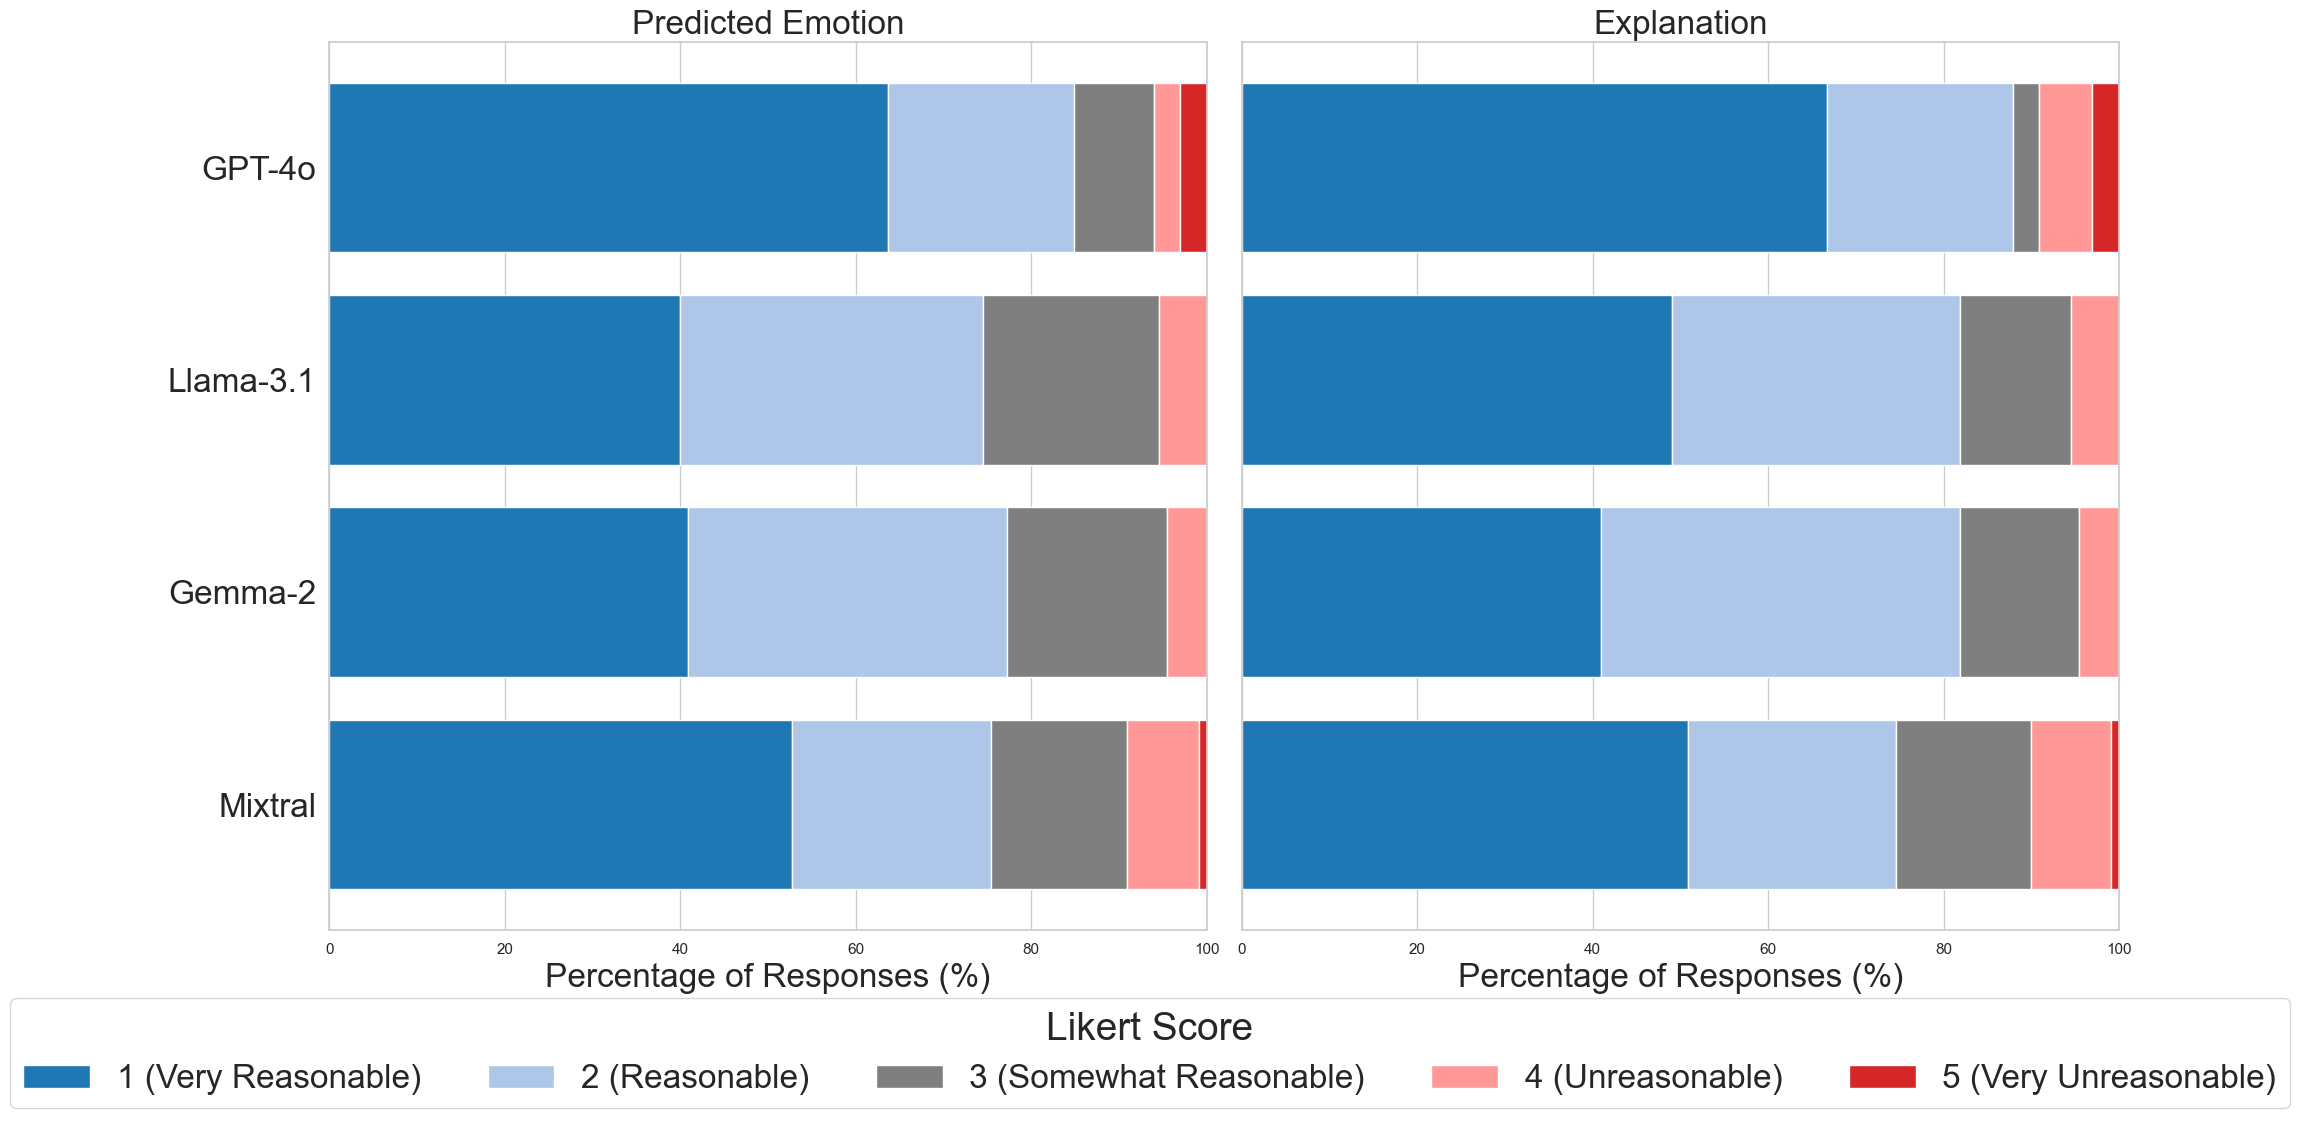

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define the data for Emotion Prediction Quality
data_pred = {
    'LLM': ['Mixtral', 'Gemma-2', 'Llama-3.1', 'GPT-4o'],
    '1 (Very Reasonable)': [52.73, 40.91, 40.00, 63.64],
    '2 (Reasonable)': [22.73, 36.36, 34.55, 21.21],
    '3 (Somewhat Reasonable)': [15.45, 18.18, 20.00, 9.09],
    '4 (Unreasonable)': [8.18, 4.55, 5.45, 3.03],
    '5 (Very Unreasonable)': [0.91, 0.00, 0.00, 3.03]
}

# Define the data for Explanation Quality
data_exp = {
    'LLM': ['Mixtral', 'Gemma-2', 'Llama-3.1', 'GPT-4o'],
    '1 (Very Reasonable)': [50.91, 40.91, 49.09, 66.67],
    '2 (Reasonable)': [23.64, 40.91, 32.73, 21.21],
    '3 (Somewhat Reasonable)': [15.45, 13.64, 12.73, 3.03],
    '4 (Unreasonable)': [9.09, 4.55, 5.45, 6.06],
    '5 (Very Unreasonable)': [0.91, 0.00, 0.00, 3.03]
}

# Convert dictionaries to DataFrames
df_pred = pd.DataFrame(data_pred)
df_exp = pd.DataFrame(data_exp)

# Set 'LLM' as the index for both DataFrames
df_pred.set_index('LLM', inplace=True)
df_exp.set_index('LLM', inplace=True)

# Define the blue-red diverging color palette with neutral gray
colors = {
    '1 (Very Reasonable)': '#1f77b4',           # Dark Blue
    '2 (Reasonable)': '#aec7e8',                # Light Blue
    '3 (Somewhat Reasonable)': '#7f7f7f',       # Gray
    '4 (Unreasonable)': '#ff9896',              # Light Red
    '5 (Very Unreasonable)': '#d62728'          # Red
}

# Define the order of categories for consistency
categories = ['1 (Very Reasonable)', '2 (Reasonable)', '3 (Somewhat Reasonable)', 
              '4 (Unreasonable)', '5 (Very Unreasonable)']

# Initialize the matplotlib figure and axes
fig, axes = plt.subplots(1, 2, figsize=(20, 12), sharey=True)

# Adjust the layout for better spacing
plt.subplots_adjust(wspace=0.3)

# Function to plot horizontal stacked bar charts
def plot_stacked_bar(ax, df, title, colors, categories):
    # Initialize the bottom positions
    bottom = [0] * len(df)
    
    # Plot each category
    for category in categories:
        ax.barh(df.index, df[category], left=bottom, color=colors[category], label=category)
        # Update the bottom for the next category
        bottom = [i + j for i, j in zip(bottom, df[category])]
    
    # Set title and labels with increased font sizes
    ax.set_title(title, fontsize=24)
    ax.set_xlabel('Percentage of Responses (%)', fontsize=24)
    # ax.set_ylabel('LLM Model', fontsize=20)
    
    # Increase the font size of the y-axis labels (LLM names)
    ax.tick_params(axis='y', labelsize=24)

# Plot Emotion Prediction Quality
plot_stacked_bar(axes[0], df_pred, 'Predicted Emotion', colors, categories)

# Plot Explanation Quality
plot_stacked_bar(axes[1], df_exp, 'Explanation', colors, categories)

# Create a single legend for both plots and place it at the bottom with increased font sizes
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, title='Likert Score', fontsize=24, title_fontsize=28)

# Add an overall title
#fig.suptitle('Human Study Results', fontsize=28, y=0.98)

# Improve layout and make space for the legend and overall title
plt.tight_layout(rect=[0, 0.10, 1, 0.95])

# Display the plots
plt.show()


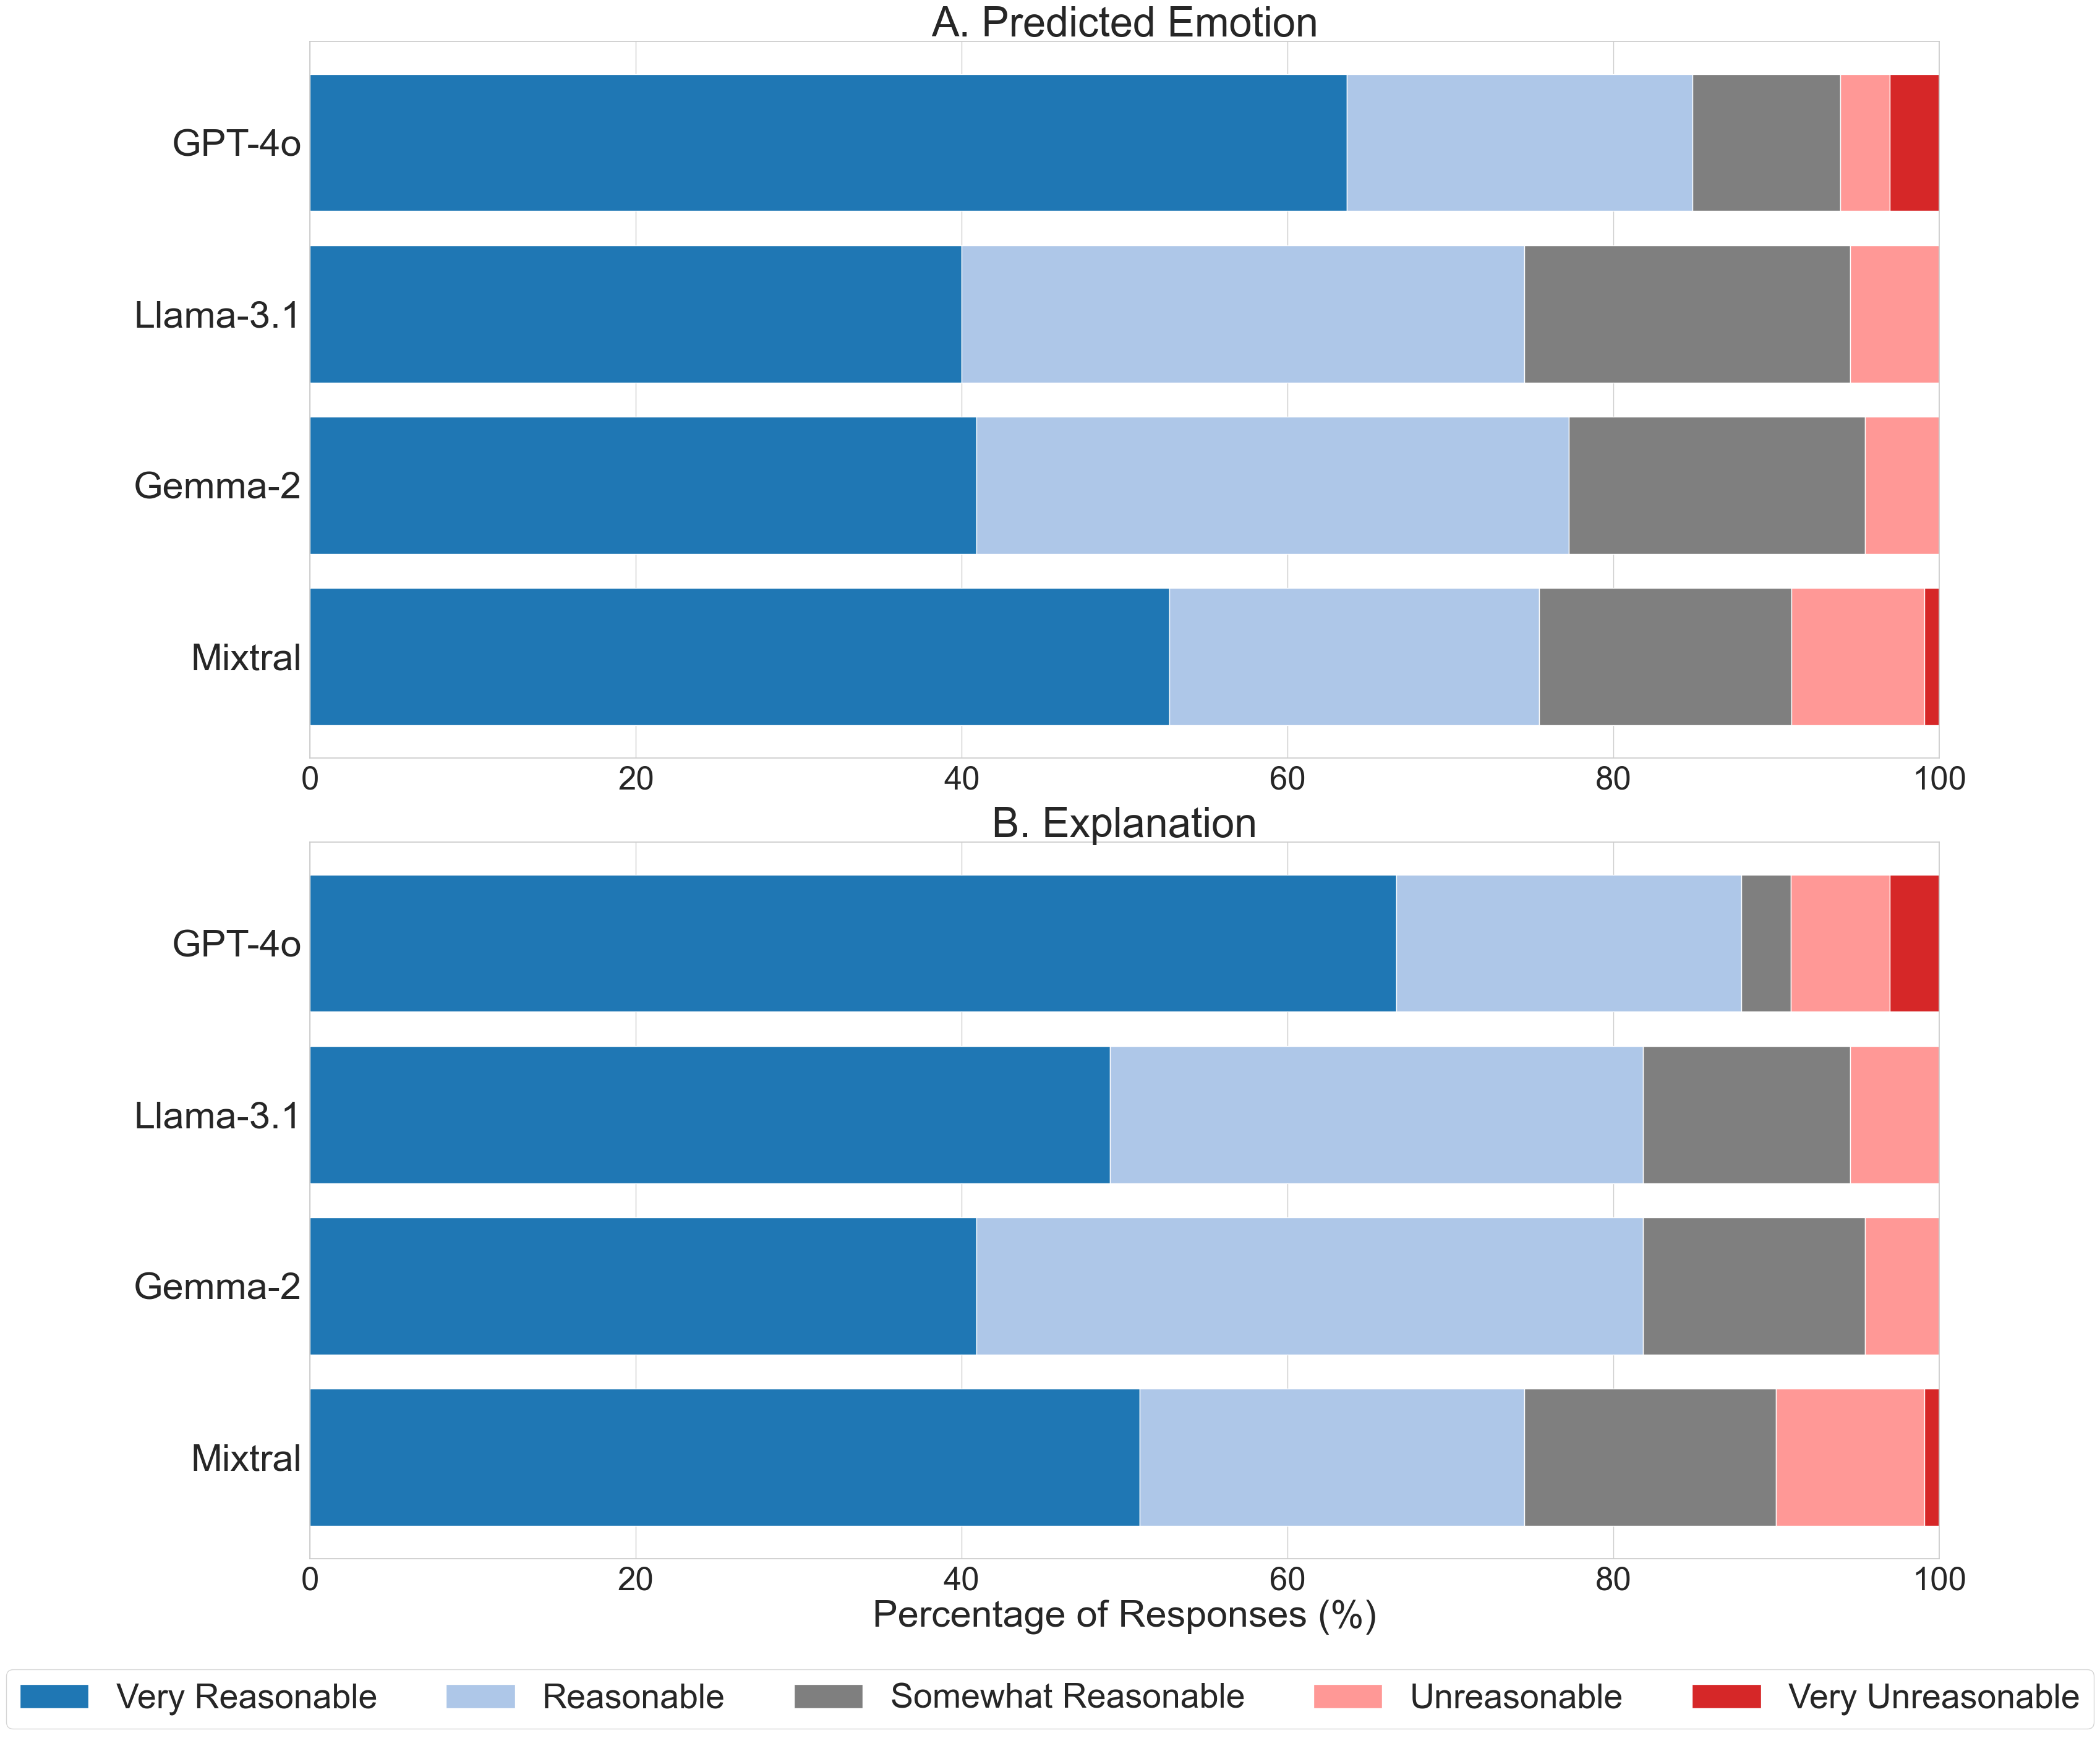

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for better aesthetics
sns.set(style="whitegrid")

# Define the data for Emotion Prediction Quality
data_pred = {
    'LLM': ['Mixtral', 'Gemma-2', 'Llama-3.1', 'GPT-4o'],
    'Very Reasonable': [52.73, 40.91, 40.00, 63.64],
    'Reasonable': [22.73, 36.36, 34.55, 21.21],
    'Somewhat Reasonable': [15.45, 18.18, 20.00, 9.09],
    'Unreasonable': [8.18, 4.55, 5.45, 3.03],
    'Very Unreasonable': [0.91, 0.00, 0.00, 3.03]
}

# Define the data for Explanation Quality
data_exp = {
    'LLM': ['Mixtral', 'Gemma-2', 'Llama-3.1', 'GPT-4o'],
    'Very Reasonable': [50.91, 40.91, 49.09, 66.67],
    'Reasonable': [23.64, 40.91, 32.73, 21.21],
    'Somewhat Reasonable': [15.45, 13.64, 12.73, 3.03],
    'Unreasonable': [9.09, 4.55, 5.45, 6.06],
    'Very Unreasonable': [0.91, 0.00, 0.00, 3.03]
}

# Convert dictionaries to DataFrames
df_pred = pd.DataFrame(data_pred)
df_exp = pd.DataFrame(data_exp)

# Set 'LLM' as the index for both DataFrames
df_pred.set_index('LLM', inplace=True)
df_exp.set_index('LLM', inplace=True)

# Define the blue-red diverging color palette with neutral gray
colors = {
    'Very Reasonable': '#1f77b4',           # Dark Blue
    'Reasonable': '#aec7e8',                # Light Blue
    'Somewhat Reasonable': '#7f7f7f',       # Gray
    'Unreasonable': '#ff9896',              # Light Red
    'Very Unreasonable': '#d62728'          # Red
}

# Define the order of categories for consistency
categories = ['Very Reasonable', 'Reasonable', 'Somewhat Reasonable', 
              'Unreasonable', 'Very Unreasonable']

# Initialize the matplotlib figure and axes
fig, axes = plt.subplots(2, 1, figsize=(30, 30), sharey=True)

# Adjust the layout for better spacing
plt.subplots_adjust(wspace=0.3, bottom=0.15)

# Function to plot horizontal stacked bar charts
def plot_stacked_bar(ax, df, title, colors, categories, set_labels=True):
    # Initialize the bottom positions
    bottom = [0] * len(df)
    
    # Plot each category
    for category in categories:
        ax.barh(df.index, df[category], left=bottom, color=colors[category], label=category)
        # Update the bottom for the next category
        bottom = [i + j for i, j in zip(bottom, df[category])]
    
    # Set title and labels with increased font sizes
    ax.set_title(title, fontsize=48)
    if set_labels:
        ax.set_xlabel('Percentage of Responses (%)', fontsize=44)
    # Remove y-axis label to prevent redundancy
    ax.set_ylabel('')
    
    # Increase the font size of the y-axis labels (LLM names)
    ax.tick_params(axis='y', labelsize=44)
    ax.tick_params(axis='x', labelsize=38)

# Plot Emotion Prediction Quality
plot_stacked_bar(axes[0], df_pred, 'A. Predicted Emotion', colors, categories, False)

# Plot Explanation Quality
plot_stacked_bar(axes[1], df_exp, 'B. Explanation', colors, categories)

# Create a single legend for both plots and place it at the bottom with increased font sizes
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', ncol=5, title='', fontsize=40, title_fontsize=34)

# Improve layout and make space for the legend and overall title
plt.tight_layout(rect=[0, 0.06, 1, 0.95])

# Display the plots
plt.show()
